4.2.1 오차 제곱합

In [1]:
%matplotlib inline

In [2]:
import numpy as np

In [3]:
def sum_squares_error(y,t):
    return 0.5 * np.sum((y-t)**2)

In [4]:
# 답은 2 
t = [0,0,1,0,0,0,0,0,0,0]

y = [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0,0]
print("2가 가장 높은 확률일 때 error:", sum_squares_error(np.array(y),np.array(t)))


y = [0.1, 0.05, 0, 0, 0.05, 0.1, 0.6, 0.1, 0,0]
print("7이 가장 높은 확률일 때 error:", sum_squares_error(np.array(y),np.array(t)))

# 잘 맞았을 때 에러가 더 작은 것을 알 수 있음

2가 가장 높은 확률일 때 error: 0.09750000000000003
7이 가장 높은 확률일 때 error: 0.6975


4.2.2 교차 엔트로피 오차

In [5]:
def cross_entropy_error(y, t):
    delta = 1e-7  # log 0 = -inf 이므로 방지하기 위해 
    return -np.sum(t * np.log(y + delta))

In [6]:
# 답은 2 
t = [0,0,1,0,0,0,0,0,0,0]

y = [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0,0]
print("2가 가장 높은 확률일 때 error:", cross_entropy_error(np.array(y),np.array(t)))


y = [0.1, 0.05, 0, 0, 0.05, 0.1, 0.6, 0.1, 0,0]
print("7이 가장 높은 확률일 때 error:", cross_entropy_error(np.array(y),np.array(t)))

# 잘 맞았을 때 에러가 더 작은 것을 알 수 있음

2가 가장 높은 확률일 때 error: 0.510825457099338
7이 가장 높은 확률일 때 error: 16.11809565095832


4.2.3 미니배치 학습

In [7]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

# x_train: (60000, 784)
# t_train: (10000, 10)
(x_train, t_train), (x_test, t_test) =\
    load_mnist(normalize=True, one_hot_label=True)


In [8]:
train_size = x_train.shape[0]  # 60000
batch_size = 10  # 뽑을 수 

# 0~59999에서 10개를 뽑기
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)

# 뽑은 10개를 인덱스로 사용 
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

[19417 59461 35178 44379  5066 58525  3419 30710 10797 50286]


4.2.4 (배치용) 교차 엔트로피 오차 구현하기

In [9]:
def cross_entropy_error(y,t):
    print("before t:",t)
    # 만약 데이터가 하나라면? 차원이 1이됨 
    # t,y를 (n,) 에서 (1,n)으로 모양을 바꿔줌 
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    print("after t:", t)

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [10]:
# 답은 2 
t = [0,0,1,0,0,0,0,0,0,0]

y = [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0,0]
print("2가 가장 높은 확률일 때 error:", cross_entropy_error(np.array(y),np.array(t)))


y = [0.1, 0.05, 0, 0, 0.05, 0.1, 0.6, 0.1, 0,0]
print("7이 가장 높은 확률일 때 error:", cross_entropy_error(np.array(y),np.array(t)))

# 잘 맞았을 때 에러가 더 작은 것을 알 수 있음

before t: [0 0 1 0 0 0 0 0 0 0]
after t: [[0 0 1 0 0 0 0 0 0 0]]
2가 가장 높은 확률일 때 error: 0.510825457099338
before t: [0 0 1 0 0 0 0 0 0 0]
after t: [[0 0 1 0 0 0 0 0 0 0]]
7이 가장 높은 확률일 때 error: 16.11809565095832


In [11]:
# 데이터들이 배치일때(하나에 여러개의 데이터 존재) 
t = [[0,0,1,0,0,0,0,0,0,0], [0,0,0,0,0,1,0,0,0,0]]

y = [[0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0,0],\
    [0.1, 0.05, 0, 0, 0.05, 0.1, 0.6, 0.1, 0,0]]

print(cross_entropy_error(np.array(y), np.array(t)))

before t: [[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]]
after t: [[0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]]
1.406704775046942


In [12]:
# 정답이 one-hot encoding이 아닐 때
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    # y[0,t[0]], y[1,t[1]], ..., y[batch_size-1, t[batch_size-1]]
    return -np.sum(np.log(y[np.arange(batch_size),t] + 1e-7)) / batch_size 

In [13]:
# 데이터들이 배치일때(하나에 여러개의 데이터 존재) 
t = [2,5]

y = [[0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0,0],\
    [0.1, 0.05, 0, 0, 0.05, 0.1, 0.6, 0.1, 0,0]]

print(cross_entropy_error(np.array(y), np.array(t)))

1.406704775046942


4.3.1 미분

In [14]:
# 나쁜 구현
def numerical_diff(f,x):
    h = 1e-50  # 너무 작아서 rounding error 일으킴 
    print("분자:", f(x+h) - f(x))
    print("분모:", h)
    return (f(x+h) - f(x)) / h

In [15]:
def f(x):
    return x**2

numerical_diff(f,2)

# 너무 작아서 원하는 결과가 나오지 않음 

분자: 0.0
분모: 1e-50


0.0

In [16]:
# 중심 차분과 h 값 조절 이용
def numerical_diff(f,x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [17]:
numerical_diff(f,2)
# 근사치를 얻을 수 있음 

4.000000000004

4.3.2 수치 미분의 예

In [18]:
# y = 0.01x^2 + 0.1x
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [19]:
import matplotlib.pylab as plt

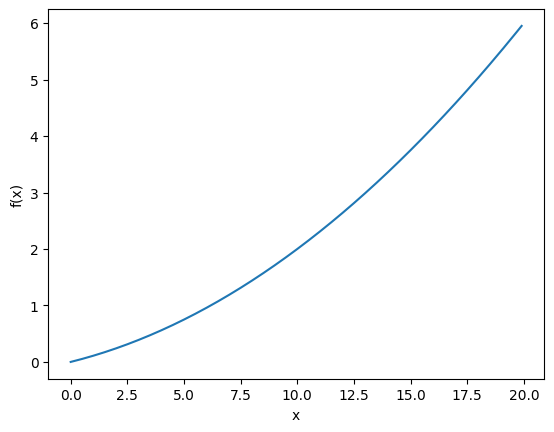

In [20]:
x = np.arange(0,20,0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [21]:
# x=5, x=10에서의 미분 값

print("f'(5):", numerical_diff(function_1, 5))
print("f'(10):", numerical_diff(function_1,10))

# 실제로 f'(x) = 0.02x + 0.1 이므로
# f'(5) = 0.2, f'(10) = 0.3

f'(5): 0.1999999999990898
f'(10): 0.2999999999986347


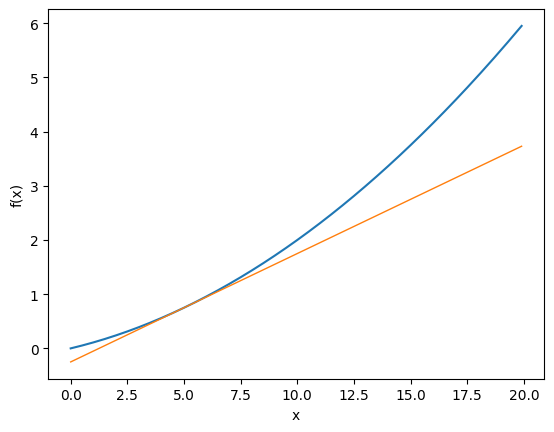

In [22]:
x = np.arange(0,20,0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
# (5, f(5)) 에서의 접선의 방정식 
# y = f'(5) (x-5) + f(5)
y_prime = numerical_diff(function_1, 5)*(x-5) + function_1(5)
plt.plot(x,y_prime,linewidth=1.0)
plt.show()

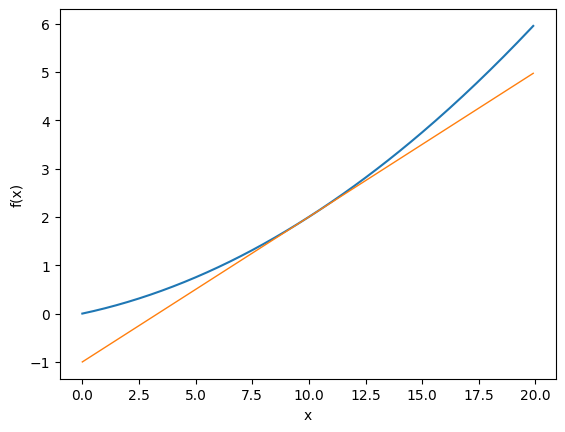

In [23]:
x = np.arange(0,20,0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
# (10, f(10)) 에서의 접선의 방정식 
# y = f'(10) (x-10) + f(10)
y_prime = numerical_diff(function_1, 10)*(x-10) + function_1(10)
plt.plot(x,y_prime,linewidth=1.0)
plt.show(block=True)

4.3.3 편미분

In [29]:
# f(x_0, x_1) = (x_0)^2 + (x_1)^2 
def function_2(x):
    return x[0]**2 + x[1]**2
    # or return np.sum(x**2)

4.4 기울기

In [40]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        # x를 되돌리기 위해 저장해놓음 
        tmp_val = x[idx]

        # idx번째 변수에 대한 미분값 구하기 
        x[idx] = tmp_val + h
        # print("h:",h)
        fxh1 = f(x)
        # print("x1:",x[idx])
        x[idx] = tmp_val - h
        fxh2 = f(x)
        # print("x2:",x[idx])
        grad[idx] = (fxh1 - fxh2) / (2*h)
        # print(fxh1, fxh2, grad[idx])
        x[idx] = tmp_val

    return grad 


In [41]:
# 대참사
for x in [[3,4],[0,2], [3,0]]:
    print("({},{}) 에서의 gradient:".format(x[0],x[1]), \
        numerical_gradient(function_2, np.array(x)))

(3,4) 에서의 gradient: [25000 35000]
(0,2) 에서의 gradient: [    0 15000]
(3,0) 에서의 gradient: [25000     0]


In [42]:
for x in [[3.0,4.0],[0.0,2.0], [3.0,0.0]]:
    print("({},{}) 에서의 gradient:".format(x[0],x[1]), \
        numerical_gradient(function_2, np.array(x)))

(3.0,4.0) 에서의 gradient: [6. 8.]
(0.0,2.0) 에서의 gradient: [0. 4.]
(3.0,0.0) 에서의 gradient: [6. 0.]


In [45]:
# why?
print("int:",np.array([3,4]).dtype)
print("float:",np.array([3.0,4.0]).dtype)

int: int32
float: float64


4.4.1 경사법(경사하강법)

In [48]:
# lr: learning rate
# step_num: 반복 횟수 
# init_x: 초기값
def gradient_descent(f, init_x, lr=0.01, step_num=100):

    x = init_x

    for i in range(step_num):
        print("{}번째 x:".format(i), x)
        grad = numerical_gradient(f,x)
        x -= lr * grad

    return x 

In [50]:
init_x = np.array([-3.0, 4.0])
print("result:",gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100))
# 결과값이 (0,0)에 매우 가까움을 알 수 있다.


0번째 x: [-3.  4.]
1번째 x: [-2.4  3.2]
2번째 x: [-1.92  2.56]
3번째 x: [-1.536  2.048]
4번째 x: [-1.2288  1.6384]
5번째 x: [-0.98304  1.31072]
6번째 x: [-0.786432  1.048576]
7번째 x: [-0.6291456  0.8388608]
8번째 x: [-0.50331648  0.67108864]
9번째 x: [-0.40265318  0.53687091]
10번째 x: [-0.32212255  0.42949673]
11번째 x: [-0.25769804  0.34359738]
12번째 x: [-0.20615843  0.27487791]
13번째 x: [-0.16492674  0.21990233]
14번째 x: [-0.1319414   0.17592186]
15번째 x: [-0.10555312  0.14073749]
16번째 x: [-0.08444249  0.11258999]
17번째 x: [-0.06755399  0.09007199]
18번째 x: [-0.0540432   0.07205759]
19번째 x: [-0.04323456  0.05764608]
20번째 x: [-0.03458765  0.04611686]
21번째 x: [-0.02767012  0.03689349]
22번째 x: [-0.02213609  0.02951479]
23번째 x: [-0.01770887  0.02361183]
24번째 x: [-0.0141671   0.01888947]
25번째 x: [-0.01133368  0.01511157]
26번째 x: [-0.00906694  0.01208926]
27번째 x: [-0.00725355  0.00967141]
28번째 x: [-0.00580284  0.00773713]
29번째 x: [-0.00464228  0.0061897 ]
30번째 x: [-0.00371382  0.00495176]
31번째 x: [-0.00297106  0.0039

In [51]:
init_x = np.array([-3.0, 4.0])
print("result:",gradient_descent(function_2, init_x=init_x, lr=10, step_num=100))
# learning rate가 높으면 발산할 수 있다


0번째 x: [-3.  4.]
1번째 x: [ 57. -76.]
2번째 x: [-1083.00000003  1444.00000007]
3번째 x: [ 20576.99999267 -27436.00002124]
4번째 x: [-390963.00759858  521284.00215314]
5번째 x: [ 7428296.63595611 -9904396.53983905]
6번째 x: [-1.41137328e+08  1.88183103e+08]
7번째 x: [ 2.68126267e+09 -3.57501690e+09]
8번째 x: [-5.09763373e+10  6.79001831e+10]
9번째 x: [ 9.45170863e+11 -1.29524862e+12]
10번째 x: [-2.58983747e+13 -1.29524862e+12]
11번째 x: [-2.58983747e+13 -1.29524862e+12]
12번째 x: [-2.58983747e+13 -1.29524862e+12]
13번째 x: [-2.58983747e+13 -1.29524862e+12]
14번째 x: [-2.58983747e+13 -1.29524862e+12]
15번째 x: [-2.58983747e+13 -1.29524862e+12]
16번째 x: [-2.58983747e+13 -1.29524862e+12]
17번째 x: [-2.58983747e+13 -1.29524862e+12]
18번째 x: [-2.58983747e+13 -1.29524862e+12]
19번째 x: [-2.58983747e+13 -1.29524862e+12]
20번째 x: [-2.58983747e+13 -1.29524862e+12]
21번째 x: [-2.58983747e+13 -1.29524862e+12]
22번째 x: [-2.58983747e+13 -1.29524862e+12]
23번째 x: [-2.58983747e+13 -1.29524862e+12]
24번째 x: [-2.58983747e+13 -1.29524862e+12]
25

In [52]:
init_x = np.array([-3.0, 4.0])
print("result:",gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100))
# learning rate가 너무 작으면 수렴하지 않을 수 있다 


0번째 x: [-3.  4.]
1번째 x: [-3.  4.]
2번째 x: [-3.  4.]
3번째 x: [-3.  4.]
4번째 x: [-3.  4.]
5번째 x: [-3.  4.]
6번째 x: [-3.  4.]
7번째 x: [-3.          3.99999999]
8번째 x: [-3.          3.99999999]
9번째 x: [-2.99999999  3.99999999]
10번째 x: [-2.99999999  3.99999999]
11번째 x: [-2.99999999  3.99999999]
12번째 x: [-2.99999999  3.99999999]
13번째 x: [-2.99999999  3.99999999]
14번째 x: [-2.99999999  3.99999999]
15번째 x: [-2.99999999  3.99999999]
16번째 x: [-2.99999999  3.99999999]
17번째 x: [-2.99999999  3.99999999]
18번째 x: [-2.99999999  3.99999999]
19번째 x: [-2.99999999  3.99999998]
20번째 x: [-2.99999999  3.99999998]
21번째 x: [-2.99999999  3.99999998]
22번째 x: [-2.99999999  3.99999998]
23번째 x: [-2.99999999  3.99999998]
24번째 x: [-2.99999999  3.99999998]
25번째 x: [-2.99999998  3.99999998]
26번째 x: [-2.99999998  3.99999998]
27번째 x: [-2.99999998  3.99999998]
28번째 x: [-2.99999998  3.99999998]
29번째 x: [-2.99999998  3.99999998]
30번째 x: [-2.99999998  3.99999998]
31번째 x: [-2.99999998  3.99999998]
32번째 x: [-2.99999998  3.99999997]


4.4.2 신경망에서의 기울기

In [53]:
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [54]:
class simpleNet:
    def __init__(self):
        # 책에서는 rand(2,3)을 쓴듯?
        # rand(): 0~1 균일 분포
        # randn(): 평균이 0이고 표준편차가 1인 정규분포 
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)

        return loss

In [56]:
net = simpleNet()
print(net.W)

[[ 1.62584003  0.11008835  1.03844476]
 [ 0.73831286 -0.39990646 -0.00326571]]


In [57]:
x = np.array([.6, .9])
p = net.predict(x)
print("p:",p)

p: [ 1.63998559 -0.2938628   0.62012772]


In [60]:
print("가장 큰 값의 인덱스:",np.argmax(p))
t = np.array([1,0,0])
print("loss:",net.loss(x,t))

가장 큰 값의 인덱스: 0
loss: 0.4089501309932537


In [64]:
# 람다 기법을 사용해서 더 짧게 구현 가능
# f = lambda w: net.loss(x,t)
def f(W):
    # 일단 임시로 x=[0.6,0.9], t=[1,0,0] 사용
    return net.loss(x,t)

# 여기서 numerical_gradient() 함수는 수정된 버전임
dW = numerical_gradient(f, net.W)
dW

array([[-0.20139161,  0.05763505,  0.14375657],
       [-0.30208742,  0.08645257,  0.21563485]])